# Ch-Thirmal Raju (2211cs010112)
# Student Performance Analysis using PySpark

In [16]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Start Spark
spark = SparkSession.builder.appName("Student Performance Analysis using PySpark").getOrCreate()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [23]:
# Load CSV
df = spark.read.csv("MruStudentsdata.csv", header=True, inferSchema=True)

print("Spark Schema:")
df.printSchema()

# Convert to Pandas
pdf = df.toPandas()
print("Columns:", pdf.columns.tolist())
pdf.head()


Spark Schema:
root
 |-- RollNo: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Section: string (nullable = true)
 |-- Python: integer (nullable = true)
 |-- Java: integer (nullable = true)
 |-- MERNStack: integer (nullable = true)
 |-- M1: integer (nullable = true)
 |-- M2: integer (nullable = true)

Columns: ['RollNo', 'Name', 'Section', 'Python', 'Java', 'MERNStack', 'M1', 'M2']


,RollNo,Name,Section,Python,Java,MERNStack,M1,M2
0,1,Student1,Section 1,70,46,90,57,98
1,2,Student2,Section 2,44,67,67,41,42
2,3,Student3,Section 3,91,95,81,54,37
3,4,Student4,Section 1,37,66,81,88,92
4,5,Student5,Section 2,80,86,67,48,97


In [25]:
# Subjects are separate columns → melt into long format
subjects = ["Python", "Java", "MERNStack", "M1","M2"]

long_df = pdf.melt(id_vars=["RollNo", "Name", "Section"], 
                   value_vars=subjects, 
                   var_name="Subject", 
                   value_name="Marks")

display(long_df.head())


,RollNo,Name,Section,Subject,Marks
0,1,Student1,Section 1,Python,70
1,2,Student2,Section 2,Python,44
2,3,Student3,Section 3,Python,91
3,4,Student4,Section 1,Python,37
4,5,Student5,Section 2,Python,80


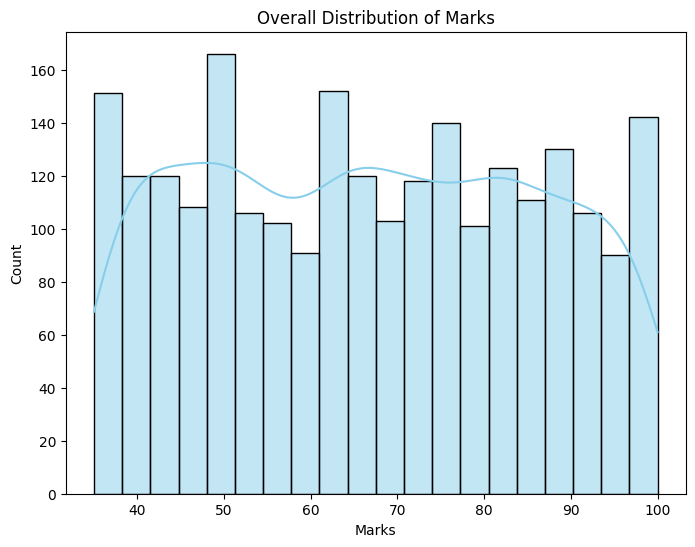

Observation:
   The marks are mostly clustered around the middle range (40–70), with fewer students at the extremes.

Suggestion:
   Provide extra support for low-scoring students and offer enrichment activities for high performers.


In [26]:
# Define insights dictionary
cell_insights = {
    "Cell 4 - Distribution of Marks": {
        "observation": "The marks are mostly clustered around the middle range (40–70), with fewer students at the extremes.",
        "suggestion": "Provide extra support for low-scoring students and offer enrichment activities for high performers."
    }
}

# 4th Analysis: Overall Distribution of Marks
plt.figure(figsize=(8,6))
sns.histplot(long_df["Marks"].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Overall Distribution of Marks")
plt.xlabel("Marks")
plt.ylabel("Count")
plt.show()

# Observation + Suggestion
cell_name = "Cell 4 - Distribution of Marks"
insight = cell_insights.get(cell_name)

if insight:
    print(f"Observation:")
    print(f"   {insight['observation']}\n")
    print(f"Suggestion:")
    print(f"   {insight['suggestion']}")
else:
    print("No insights available.")


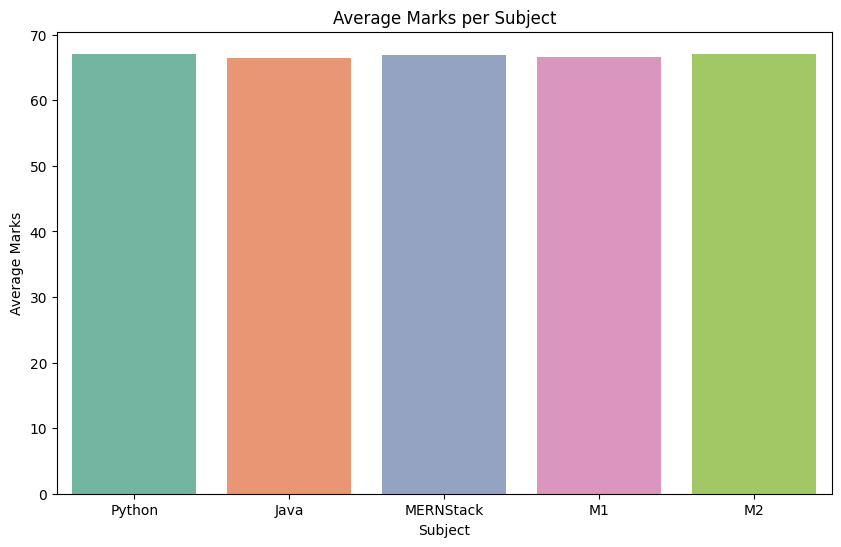

No insights available.


In [27]:
# 5th Analysis: Average Marks per Subject
plt.figure(figsize=(10,6))
sns.barplot(x="Subject", y="Marks", data=long_df, estimator=np.mean, ci=None, palette="Set2")
plt.title("Average Marks per Subject")
plt.ylabel("Average Marks")
plt.show()

# Observation + Suggestion
cell_name = "Cell 5 - Average Marks per Subject"
insight = cell_insights.get(cell_name)

if insight:
    print(f"Observation:")
    print(f"   {insight['observation']}\n")
    print(f"Suggestion:")
    print(f"   {insight['suggestion']}")
else:
    print(f"No insights available.")


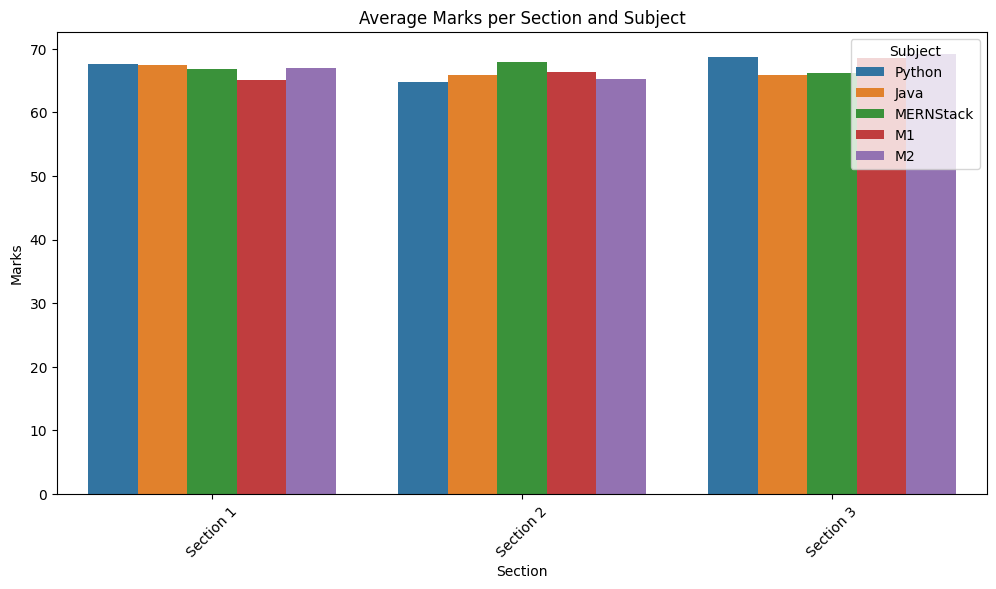

No insights available.


In [33]:
# 7th Analysis: Average Marks per Section and Subject
plt.figure(figsize=(12,6))
sns.barplot(x="Section", y="Marks", hue="Subject", data=long_df, ci=None, estimator=np.mean)
plt.title("Average Marks per Section and Subject")
plt.xticks(rotation=45)
plt.show()


# Observation + Suggestion
cell_name = "Cell 7 - Section-wise Comparison"
insight = cell_insights.get(cell_name)

if insight:
    print(f"Observation:")
    print(f"   {insight['observation']}\n")
    print(f"Suggestion:")
    print(f"   {insight['suggestion']}")
else:
    print(f"No insights available.")


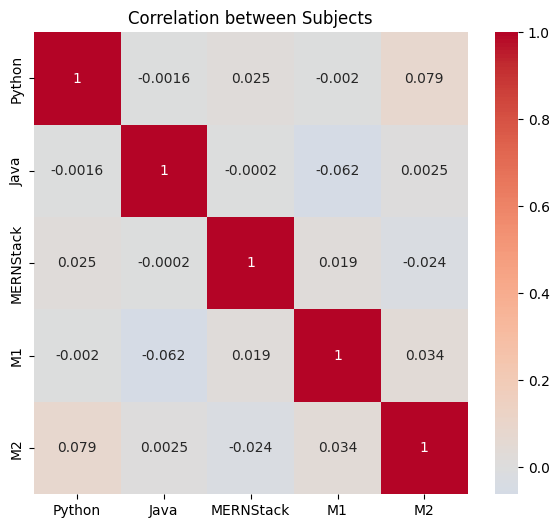

No insights available.


In [34]:
# 8th Analysis: Correlation Heatmap of Subjects

# Convert subject columns to numeric (ignore errors -> non-numeric will become NaN)
for col in subjects:
    pdf[col] = pd.to_numeric(pdf[col], errors='coerce')

# Drop rows where all subjects are NaN
pdf = pdf.dropna(subset=subjects, how='all')

# Generate correlation heatmap
plt.figure(figsize=(7,6))
sns.heatmap(pdf[subjects].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Subjects")
plt.show()

# Observation + Suggestion
cell_name = "Cell 8 - Correlation Heatmap"
insight = cell_insights.get(cell_name)

if insight:
    print(f"Observation:")
    print(f"   {insight['observation']}\n")
    print(f"Suggestion:")
    print(f"   {insight['suggestion']}")
else:
    print(f"No insights available.")


<Figure size 1200x600 with 0 Axes>

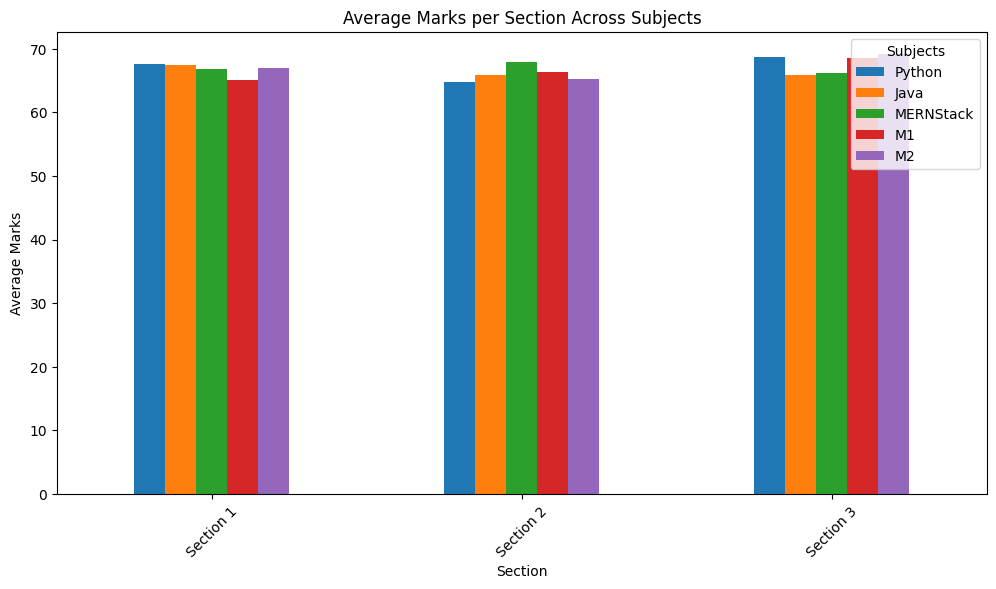

No insights available.


In [38]:
# 9th Analysis: Average Marks per Section for Each Subject
avg_section = pdf.groupby("Section")[subjects].mean()

plt.figure(figsize=(12,6))
avg_section.plot(kind="bar", figsize=(12,6))
plt.title("Average Marks per Section Across Subjects")
plt.xlabel("Section")
plt.ylabel("Average Marks")
plt.legend(title="Subjects")
plt.xticks(rotation=45)
plt.show()

# Observation + Suggestion
cell_name = "Cell 9 - Average Marks per Section Across Subjects"
insight = cell_insights.get(cell_name)

if insight:
    print(f"Observation:")
    print(f"   {insight['observation']}\n")
    
    # Dynamic observations per subject
    print("Detailed Observations:")
    for sub in subjects:
        best_section = avg_section[sub].idxmax()
        worst_section = avg_section[sub].idxmin()
        print(f"➡️ In {sub}, Section {best_section} performed best while Section {worst_section} performed lowest.")
    
    print(f"\nSuggestion:")
    print(f"   {insight['suggestion']}")
else:
    print(f"No insights available.")


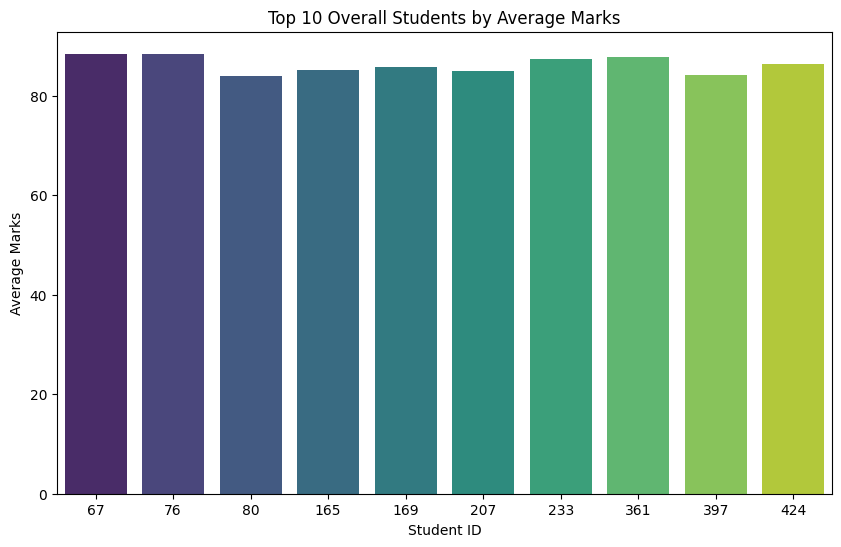

No insights available.


In [39]:
# Average marks per student
pdf["AvgMarks"] = pdf[subjects].mean(axis=1)

# Top 10 overall performers
top_overall = pdf[["RollNo", "AvgMarks"]].sort_values(by="AvgMarks", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="RollNo", y="AvgMarks", data=top_overall, palette="viridis")
plt.title("Top 10 Overall Students by Average Marks")
plt.xlabel("Student ID")
plt.ylabel("Average Marks")
plt.show()

# Observation + Suggestion
cell_name = "Cell 11 - Top 10 Overall Students"
insight = cell_insights.get(cell_name)

if insight:
    print(f"Observation:")
    print(f"   {insight['observation']}\n")
    
    # Dynamic observations for top students
    print("Detailed Observations:")
    for idx, row in top_overall.iterrows():
        print(f"➡️ Student {row['RollNo']} has an average mark of {row['AvgMarks']:.2f}")
    
    print(f"\nSuggestion:")
    print(f"   {insight['suggestion']}")
else:
    print(f"No insights available.")


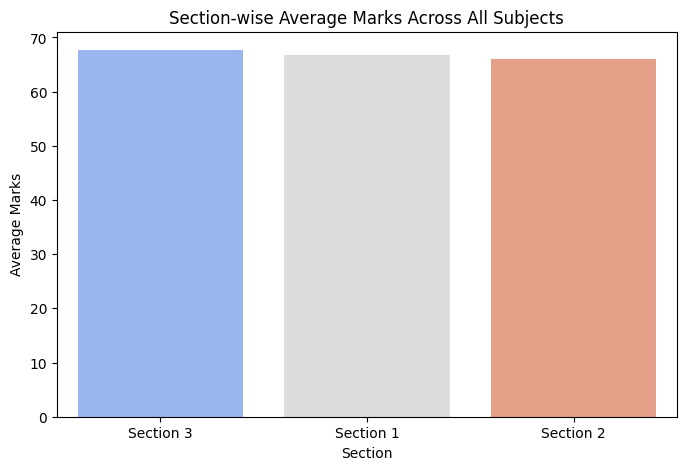

No insights available.


In [40]:
# Section-wise average across all subjects
pdf["TotalAvg"] = pdf[subjects].mean(axis=1)
section_avg = pdf.groupby("Section")["TotalAvg"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=section_avg.index, y=section_avg.values, palette="coolwarm")
plt.title("Section-wise Average Marks Across All Subjects")
plt.xlabel("Section")
plt.ylabel("Average Marks")
plt.show()

# Observation + Suggestion
cell_name = "Cell 12 - Section-wise Overall Performance"
insight = cell_insights.get(cell_name)

if insight:
    print(f"Observation:")
    print(f"   {insight['observation']}\n")
    
    # Dynamic observations per section
    print("Detailed Observations:")
    for sec, avg_mark in section_avg.items():
        print(f"➡️ Section {sec} has an overall average of {avg_mark:.2f} marks.")
    
    print(f"\nSuggestion:")
    print(f"   {insight['suggestion']}")
else:
    print(f"No insights available.")
